In [100]:
#Define Constants:
from scipy.constants import G, c, pi
Msun = 1.98892e30    #kg
kg_in_Msun = 1./Msun
m_in_Msun = c**2/G/Msun
s_in_Msun = c**3/G/Msun

In [101]:
import sys, os, shutil
import numpy as np
import matplotlib.pyplot as plt
sim_dir = '/mnt/localdata1/bt22824/simulations/'

run_dir_list    = [
    '/frontera/NSBH_q5_D9/NSBH_q5_D9_C0.113_M69.0',
    '/frontera/NSBH_q5_D9/NSBH_q5_D9_C0.126_M78.4',
    '/frontera/NSBH_q5_D9/NSBH_q5_D9_C0.158_M101.8',
    '/frontera/NSBH_q5_D9/NSBH_q5_D9_C0.173_M113.7',
]

Compactness_list_q5_D9 = [
    0.113,
    0.126,
    0.158,
    0.173
]

Label_list_q5_D9 = [
    "C=0.113",
    "C=0.126",
    "C=0.158",
    "C=0.173"
]

color_list = ['blue','red','green','orange']


run_name_list = []
for run_dir in run_dir_list:
    run_name = (run_dir.split('/'))[-1] ##TODO
    print(run_name)
    run_name_list.append(run_name)


save_dir = sim_dir + 'figures/paper_NSBHC/paper_NSBHC_img/'
data_dir = sim_dir + 'figures/paper_NSBHC/paper_NSBHC_data/'

NSBH_q5_D9_C0.113_M69.0
NSBH_q5_D9_C0.126_M78.4
NSBH_q5_D9_C0.158_M101.8
NSBH_q5_D9_C0.173_M113.7


In [102]:
sys.path.append('/home/bt22824/bnsid_maya/plot_BNS/')
import kuibit_BNS as kb
output_dir_list = kb.get_output_dir(sim_dir,run_dir_list)
BNS_list = []
for i, run_dir in enumerate(run_dir_list):
    BNS = kb.BNS_sim(sim_dir + run_dir_list[i])
    BNS_list.append(BNS)

NSBH_q5_D9_C0.113_M69.0
NSBH_q5_D9_C0.126_M78.4
NSBH_q5_D9_C0.158_M101.8
NSBH_q5_D9_C0.173_M113.7


In [103]:
mayawaves_path = "/home/bt22824/Maya/tools/mayawaves/"
sys.path.append(mayawaves_path)
from mayawaves.utils.postprocessingutils import create_h5_from_simulation
from mayawaves.coalescence import Coalescence
from mayawaves.utils.postprocessingutils import export_to_lvcnr_catalog


In [104]:
h5_filename_list = []
refresh = False
for i, run_dir in enumerate(run_dir_list):
    simulation_path = sim_dir + run_dir
    output_path = sim_dir + run_dir
    print("Exporting to h5 file ...")
    if(run_dir_list[i].split('/')[-1] + ".h5" in os.listdir(output_path)):
        print("h5 file already exist")
        h5_filename = output_path + "/" + run_dir_list[i].split('/')[-1] + ".h5"
        if(refresh):
            os.remove(h5_filename)
            h5_filename = create_h5_from_simulation(simulation_path, output_path)
    else:
        h5_filename = create_h5_from_simulation(simulation_path, output_path)
    
    h5_filename_list.append(h5_filename)
    print("h5file is ", h5_filename + "\n")

Exporting to h5 file ...
h5 file already exist
h5file is  /mnt/localdata1/bt22824/simulations//frontera/NSBH_q5_D9/NSBH_q5_D9_C0.113_M69.0/NSBH_q5_D9_C0.113_M69.0.h5

Exporting to h5 file ...
h5 file already exist
h5file is  /mnt/localdata1/bt22824/simulations//frontera/NSBH_q5_D9/NSBH_q5_D9_C0.126_M78.4/NSBH_q5_D9_C0.126_M78.4.h5

Exporting to h5 file ...
h5 file already exist
h5file is  /mnt/localdata1/bt22824/simulations//frontera/NSBH_q5_D9/NSBH_q5_D9_C0.158_M101.8/NSBH_q5_D9_C0.158_M101.8.h5

Exporting to h5 file ...
h5 file already exist
h5file is  /mnt/localdata1/bt22824/simulations//frontera/NSBH_q5_D9/NSBH_q5_D9_C0.173_M113.7/NSBH_q5_D9_C0.173_M113.7.h5



In [6]:
BNS_coal_list = []
for h5_filename in h5_filename_list:
    BNS_coal_list.append(Coalescence(h5_filename))
    
BBH_coal = Coalescence(sim_dir + '/frontera/BBH_q5_D9_M116/BBH_q5_D9_M116.h5')

In [7]:
def finite_difference(x,y,order=2):
    dydx = np.zeros_like(x)
    if(order == 2):
        if(len(x) > 2):
            dydx[1:-1] = (y[2:]-y[0:-2])/(x[2:]-x[:-2])
            dydx[0] = (y[1]-y[0])/(x[1]-x[0])
            dydx[-1] = (y[-1]-y[-2])/(x[-1]-x[-2])
    return dydx

In [152]:
t_label = r"$\bar{t}_r$ / M"
t_label = r"$t$ / M"
# t_merger_label = r"$(\bar{t}_r - T_{mx})$ / M"
t_merger_label = r"$(t - T_{mx})$ / M"
# t_merger_label = r"t / M"
radius = 130
qq = 5

# Convergence test

In [30]:
new_h5_filename_list = []
new_run_dir_list = ['/frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M100.0']
sys.path.append('/home/bt22824/bnsid_maya/mayawave_bns/')
generate_shiftTracker = False
if(generate_shiftTracker):
    import ShiftTracker_generator as sg
    ################ ShiftTracker writer ###################################################
    simulation_type = "NSBH"
    for run_dir in new_run_dir_list:
        sg.write_to_ShiftTracker(sim_dir + run_dir, simulation_type)
    ##############################################################

refresh = False
for i, run_dir in enumerate(new_run_dir_list):
    simulation_path = sim_dir + run_dir
    output_path = sim_dir + run_dir
    print("Exporting to h5 file ...")
    if(run_dir.split('/')[-1] + ".h5" in os.listdir(output_path)):
        print("h5 file already exist")
        h5_filename = output_path + "/" + run_dir.split('/')[-1] + ".h5"
        if(refresh):
            os.remove(h5_filename)
            h5_filename = create_h5_from_simulation(simulation_path, output_path)
    else:
        h5_filename = create_h5_from_simulation(simulation_path, output_path)
    
    new_h5_filename_list.append(h5_filename)
    print("h5file is ", h5_filename + "\n")

Exporting to h5 file ...
storing parameter file
storing radiative information
storing compact object information
storing metadata
[Metatadata] Storing Runstats
[Metadata] Storing Dimensional Spins
[Metadata] Storing Masses
found column
using out file due to value error
[Metadata] Storing Dimensionless Spins
[Metadata] Storing Initial Separation
[Metadata] Storing Initial Frequency
h5file is  /mnt/localdata1/bt22824/simulations//frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M100.0/NSBH_q5_D9_C0.173_M100.0.h5



In [ ]:
# fig_c137 = plt.figure(figsize = (12,8))
# # C137_lo = Coalescence(sim_dir + '/frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M70.6/NSBH_q5_D9_C0.173_M70.6.h5')
# C137_lo = Coalescence(sim_dir + '/frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M100.0/NSBH_q5_D9_C0.173_M100.0.h5')
# C137_mi = Coalescence(sim_dir + '/frontera/NSBH_q5_D9/NSBH_q5_D9_C0.173_M113.7/NSBH_q5_D9_C0.173_M113.7.h5')
# C137_hi = Coalescence(sim_dir + '/frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M127.5/NSBH_q5_D9_C0.173_M127.5.h5')
# C137_list = [C137_lo, C137_mi, C137_hi]
# C137_label = ['low', 'med', 'high']

# align = True

# start_freq_std = 0.08
# time_c137_std = []
# conv_amp_std = []
# conv_phase_std = []
# conv_real_std = []
# for i, C137_coal in enumerate(C137_list):
#     time_c137, psi4_real_22, psi4_imag_22 = C137_coal.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
#     time_c137, psi4_abs_22, psi4_phase_22 = C137_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
#     merger_time_c137 = time_c137[np.argmax(psi4_abs_22)]-radius
#     Omega_c137 = finite_difference(time_c137,psi4_phase_22)
#     ## cutting off the waveform
#     start_sample = radius
#     end_sample = merger_time_c137 - 100
#     sample_freq = 1001
#     sample_num = int((end_sample - start_sample)*sample_freq)
#     dt = (end_sample - start_sample) / (sample_num-1)
#     new_t = np.arange(start_sample, end_sample, dt)
#     from scipy.interpolate import interp1d  
#     f_of_t = interp1d(time_c137-radius, np.abs(Omega_c137))
#     ph_of_t = interp1d(time_c137-radius, np.abs(psi4_phase_22))
#     new_ph = ph_of_t(new_t) - ph_of_t(merger_time_c137)
#     new_f = f_of_t(new_t)

#     x = np.max(new_t)-new_t
#     y = (-new_ph)**(8./5)
#     m,b = np.polyfit(x, y, 1)

#     x_arr = np.linspace(np.min(x),np.max(x),len(x))
#     ph_fit = -(m*(np.max(new_t)-new_t)+b)**(5./8)
#     freq_fit = 5./8*m*(m*(np.max(new_t)-new_t)+b)**(-3./8)
#     new_t_ext = np.linspace(-100,end_sample,sample_freq)
#     freq_ext = 5./8*m*(m*(end_sample-new_t_ext)+b)**(-3./8)
    
    
#     noise = new_f - freq_fit
#     fit_t_of_freq = interp1d(freq_ext, new_t_ext)
#     time_shift_std = fit_t_of_freq(start_freq_std)*0
    
#     idx_std = np.argmax(time_c137 > time_shift_std)
#     time_std  = time_c137[idx_std:]-time_shift_std
#     amp_std   = psi4_abs_22[idx_std:]
#     phase_std = psi4_phase_22[idx_std:]-psi4_phase_22[idx_std]
#     real_std  = psi4_real_22[idx_std:]
    
#     time_c137_std.append(time_std)
#     conv_amp_std.append(amp_std)
#     conv_phase_std.append(phase_std)
#     conv_real_std.append(real_std)
    
    
# # final interpolation once again for uniform comparison with convergence
# conv_sample = 1001
# conv_start_time = 200
# time_all = np.linspace(conv_start_time,conv_start_time+400,conv_sample)
# conv_amp_arr = np.zeros((3,conv_sample))
# conv_phase_arr = np.zeros((3,conv_sample))
# for i, C137_coal in enumerate(C137_list):
#     amp_of_t   = interp1d(time_c137_std[i],conv_amp_std[i])
#     phase_of_t = interp1d(time_c137_std[i],conv_phase_std[i])
#     conv_amp_arr[i]   = amp_of_t(time_all)
#     conv_phase_arr[i] = phase_of_t(time_all) - phase_of_t(time_all[0])
    
#     plt.subplot(2, 2, 1)
#     plt.plot(time_all,conv_amp_arr[i],label=C137_label[i])
    
#     plt.subplot(2, 2, 2)
#     plt.plot(time_all,conv_phase_arr[i],label=C137_label[i])
# plt.subplot(2, 2, 1)
# time_bbh, bbh_psi4_amp_22, bbh_psi4_phase_22 = BBH_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    
# conv_amp_lo_mi = np.abs(conv_amp_arr[0] - conv_amp_arr[1])
# conv_amp_mi_hi = np.abs(conv_amp_arr[1] - conv_amp_arr[2])
    
# conv_phase_lo_mi = np.abs(conv_phase_arr[0] - conv_phase_arr[1])
# conv_phase_mi_hi = np.abs(conv_phase_arr[1] - conv_phase_arr[2])

# conv_amp_lo_mi_norm = np.abs(conv_amp_arr[0] - conv_amp_arr[1])
# conv_amp_mi_hi_norm = np.abs(conv_amp_arr[1] - conv_amp_arr[2])
    
# conv_phase_lo_mi = np.abs(conv_phase_arr[0] - conv_phase_arr[1])
# conv_phase_mi_hi = np.abs(conv_phase_arr[1] - conv_phase_arr[2])


# # theta_1, theta_3 = 48.0/36, 48.0/54
# theta_1, theta_3 = 48.0/42.0, 48.0/54

# plt.subplot(2, 2, 3)
# k_amp = np.arange(1,60)*0.1
# loss_amp = np.zeros_like(k_amp)
# for ki, k in enumerate(k_amp):
    
#     amp_lhs = conv_amp_lo_mi / (theta_1**k - 1)
#     amp_rhs = conv_amp_mi_hi / (1 - theta_3**k)
#     amp_diff = amp_lhs - amp_rhs
#     amp_diff_norm = (amp_lhs**2 - amp_rhs**2)/(amp_lhs**2 + amp_rhs**2)
#     loss = np.linalg.norm(amp_diff_norm,2)/len(amp_diff_norm)
#     loss_amp[ki] = loss
    
# k_amp_min = k_amp[np.argmin(loss_amp)]
# amp_lhs_min = conv_amp_lo_mi / (theta_1**k_amp_min - 1)
# amp_rhs_min = conv_amp_mi_hi / (1 - theta_3**k_amp_min)
# print("amplitude alp = %f" % k_amp_min)

# plt.plot(time_all,amp_lhs_min,color="red" ,label='(Low - Med)'  + r'$/(\theta_{lm}^\alpha-1)$')
# plt.plot(time_all,amp_rhs_min,color="blue",label='(Med - High)' + r'$/(1-\theta_{hm}^\alpha)$')

# plt.yscale("log")
# plt.ylabel("amp")
    
# plt.plot()

# plt.subplot(2, 2, 4)
# k_phase = np.arange(1,60)*0.1
# loss_phase = np.zeros_like(k_phase)
# for ki, k in enumerate(k_phase):
#     phase_lhs = conv_phase_lo_mi / (theta_1**k - 1)
#     phase_rhs = conv_phase_mi_hi / (1 - theta_3**k)
#     phase_diff = phase_lhs - phase_rhs
#     loss = np.linalg.norm(phase_diff,2)/len(phase_diff)
#     loss_phase[ki] = loss
    
    
# k_phase_min = k_phase[np.argmin(loss_phase)]
# phase_lhs_min = conv_phase_lo_mi / (theta_1**k_phase_min - 1)
# phase_rhs_min = conv_phase_mi_hi / (1 - theta_3**k_phase_min)
# print("phase alp = %f" % k_phase_min)

# plt.plot(time_all,phase_lhs_min,color="red" ,label='(Low - Med)'  + r'$/(\theta_{lm}^\alpha-1)$')
# plt.plot(time_all,phase_rhs_min,color="blue",label='(Med - High)' + r'$/(1-\theta_{hm}^\alpha)$')
# plt.yscale("log")
# plt.ylabel("phase")
    



# ylabel_list = [r"$\mathcal{A}_{22} rM$", r"$\phi_{22}$",r"$|\Delta \mathcal{A}_{22}|rM$",r"$|\Delta \phi_{22}|$"]

# for i in range(4):
#     plt.subplot(2,2,i+1)
#     plt.legend()
#     plt.grid()
#     plt.xlabel(r"t / M")
#     plt.ylabel(ylabel_list[i])

    
# plt.figure(figsize = (12,4))
# plt.subplot(1,2,1)
# plt.plot(k_amp,loss_amp)
# plt.xlabel("k")


# plt.subplot(1,2,2)
# plt.plot(k_phase,loss_phase)
# plt.xlabel("k")

# # fig_c137.savefig(save_dir+"Ch3_q5_convergence.pdf", bbox_inches='tight')

amplitude alp = 3.800000
phase alp = 3.300000


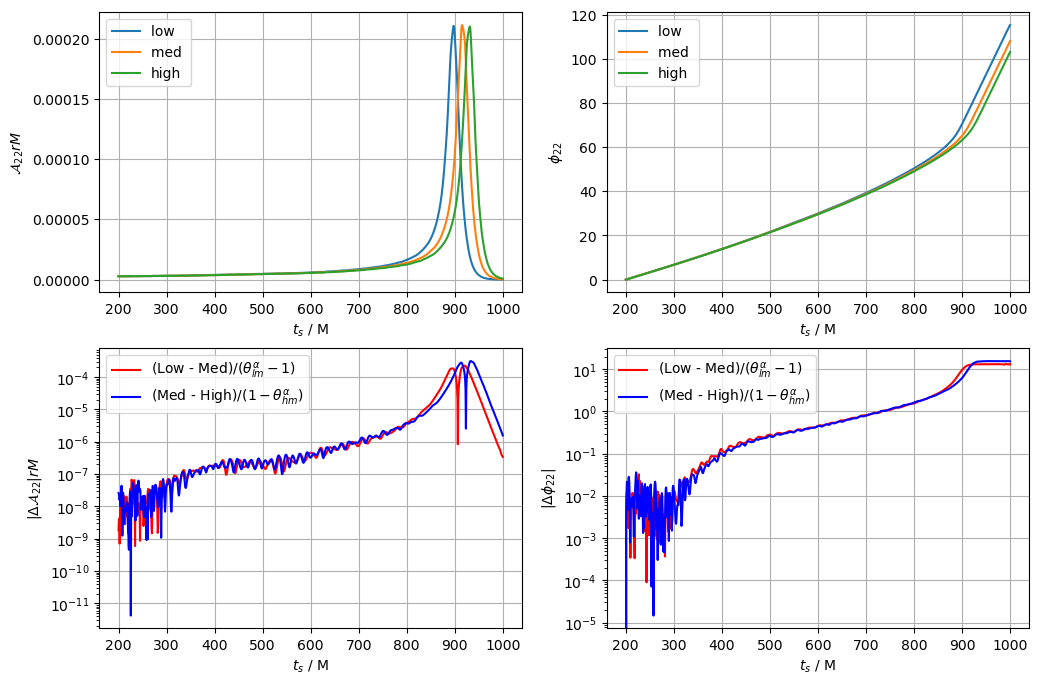

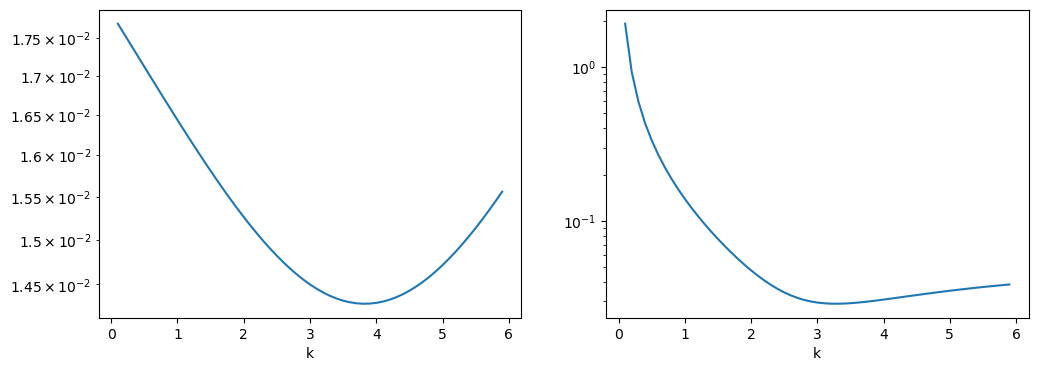

In [188]:
fig_c137 = plt.figure(figsize = (12,8))
# C137_lo = Coalescence(sim_dir + '/frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M70.6/NSBH_q5_D9_C0.173_M70.6.h5')
C137_lo = Coalescence(sim_dir + '/frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M100.0/NSBH_q5_D9_C0.173_M100.0.h5')
C137_mi = Coalescence(sim_dir + '/frontera/NSBH_q5_D9/NSBH_q5_D9_C0.173_M113.7/NSBH_q5_D9_C0.173_M113.7.h5')
C137_hi = Coalescence(sim_dir + '/frontera/NSBH_conv_q5_C137/NSBH_q5_D9_C0.173_M127.5/NSBH_q5_D9_C0.173_M127.5.h5')
C137_list = [C137_lo, C137_mi, C137_hi]
C137_label = ['low ', 'med ', 'high']

align = False

# final interpolation once again for uniform comparison with convergence
conv_sample = 1001
conv_start_time = 200
conv_end_time   = 1000
if(align):
    conv_start_time  = -200
    conv_end_time    = 100
time_all = np.linspace(conv_start_time,conv_end_time,conv_sample)
conv_amp_arr = np.zeros((3,conv_sample))
conv_phase_arr = np.zeros((3,conv_sample))
for i, C137_coal in enumerate(C137_list):
    time_c137, psi4_real_22, psi4_imag_22 = C137_coal.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
    time_c137, psi4_abs_22, psi4_phase_22 = C137_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    if(align):
        merger_time_no_shift = time_c137[np.argmax(psi4_amp_22)]
        time_c137 = time_c137 - merger_time_no_shift
        print(np.min(time_c137),np.max(time_c137),merger_time_no_shift)
    amp_of_t   = interp1d(time_c137,psi4_abs_22)
    phase_of_t = interp1d(time_c137,psi4_phase_22)
    conv_amp_arr[i]   = amp_of_t(time_all)
    conv_phase_arr[i] = phase_of_t(time_all) - phase_of_t(time_all[0])
    
    plt.subplot(2, 2, 1)
    plt.plot(time_all,conv_amp_arr[i],label=C137_label[i])
    
    plt.subplot(2, 2, 2)
    plt.plot(time_all,conv_phase_arr[i],label=C137_label[i])
plt.subplot(2, 2, 1)
time_bbh, bbh_psi4_amp_22, bbh_psi4_phase_22 = BBH_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    
conv_amp_lo_mi = np.abs(conv_amp_arr[0] - conv_amp_arr[1])
conv_amp_mi_hi = np.abs(conv_amp_arr[1] - conv_amp_arr[2])
    
conv_phase_lo_mi = np.abs(conv_phase_arr[0] - conv_phase_arr[1])
conv_phase_mi_hi = np.abs(conv_phase_arr[1] - conv_phase_arr[2])

conv_amp_lo_mi_norm = np.abs(conv_amp_arr[0] - conv_amp_arr[1])
conv_amp_mi_hi_norm = np.abs(conv_amp_arr[1] - conv_amp_arr[2])
    
conv_phase_lo_mi = np.abs(conv_phase_arr[0] - conv_phase_arr[1])
conv_phase_mi_hi = np.abs(conv_phase_arr[1] - conv_phase_arr[2])


# theta_1, theta_3 = 48.0/36, 48.0/54
theta_1, theta_3 = 48.0/42.0, 48.0/54

plt.subplot(2, 2, 3)
k_amp = np.arange(1,60)*0.1
loss_amp = np.zeros_like(k_amp)
for ki, k in enumerate(k_amp):
    
    amp_lhs = conv_amp_lo_mi / (theta_1**k - 1)
    amp_rhs = conv_amp_mi_hi / (1 - theta_3**k)
    amp_diff = amp_lhs - amp_rhs
    amp_diff_norm = (amp_lhs**2 - amp_rhs**2)/(amp_lhs**2 + amp_rhs**2)
    loss = np.linalg.norm(amp_diff_norm,2)/len(amp_diff_norm)
    loss_amp[ki] = loss
    
k_amp_min = k_amp[np.argmin(loss_amp)]
amp_lhs_min = conv_amp_lo_mi / (theta_1**k_amp_min - 1)
amp_rhs_min = conv_amp_mi_hi / (1 - theta_3**k_amp_min)
print("amplitude alp = %f" % k_amp_min)

plt.plot(time_all,amp_lhs_min,color="red" ,label='(Low - Med)'  + r'$/(\theta_{lm}^\alpha-1)$')
plt.plot(time_all,amp_rhs_min,color="blue",label='(Med - High)' + r'$/(1-\theta_{hm}^\alpha)$')

plt.yscale("log")
plt.ylabel("amp")
    
plt.plot()

plt.subplot(2, 2, 4)
k_phase = np.arange(1,60)*0.1
loss_phase = np.zeros_like(k_phase)
for ki, k in enumerate(k_phase):
    phase_lhs = conv_phase_lo_mi / (theta_1**k - 1)
    phase_rhs = conv_phase_mi_hi / (1 - theta_3**k)
    phase_diff = phase_lhs - phase_rhs
    loss = np.linalg.norm(phase_diff,2)/len(phase_diff)
    loss_phase[ki] = loss
    
    
k_phase_min = k_phase[np.argmin(loss_phase)]
phase_lhs_min = conv_phase_lo_mi / (theta_1**k_phase_min - 1)
phase_rhs_min = conv_phase_mi_hi / (1 - theta_3**k_phase_min)
print("phase alp = %f" % k_phase_min)

plt.plot(time_all,phase_lhs_min,color="red" ,label='(Low - Med)'  + r'$/(\theta_{lm}^\alpha-1)$')
plt.plot(time_all,phase_rhs_min,color="blue",label='(Med - High)' + r'$/(1-\theta_{hm}^\alpha)$')
plt.yscale("log")
plt.ylabel("phase")
    



ylabel_list = [r"$\mathcal{A}_{22} rM$", r"$\phi_{22}$",r"$|\Delta \mathcal{A}_{22}|rM$",r"$|\Delta \phi_{22}|$"]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.legend()
    plt.grid()
    plt.xlabel(r"$t_s$ / M")
    plt.ylabel(ylabel_list[i])

    
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.semilogy(k_amp,loss_amp)
plt.xlabel("k")


plt.subplot(1,2,2)
plt.semilogy(k_phase,loss_phase)
plt.xlabel("k")

fig_c137.savefig(save_dir+"Ch3_q5_convergence.pdf", bbox_inches='tight')

low  & 0.9834 & 0.4188 & 0.4515 & 11.3092 & 0.4519 & 11.5404 & 0.0872 & 2.0033 \\
med  & 0.9834 & 0.4189 & 0.4514 & 11.3452 & 0.4519 & 11.5405 & 0.1143 & 1.6926 \\
high & 0.9835 & 0.4191 & 0.4516 & 11.3320 & 0.4519 & 11.5409 & 0.0630 & 1.8105 \\


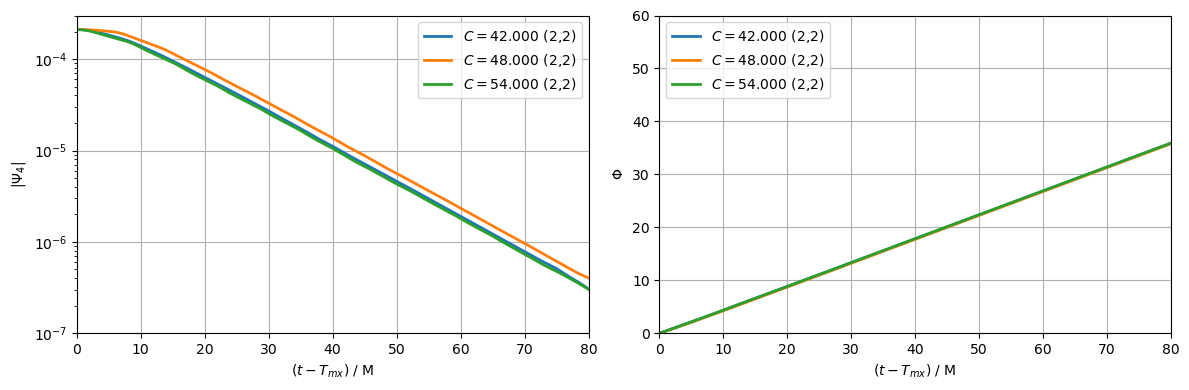

In [96]:
##quasi-normal ringing
from scipy import stats
fig, ax = plt.subplots(ncols=2,nrows=1,figsize = (12,4))
align = False
C137_N = [42,48,54]
omega_22_arr = np.zeros(3)
tau_22_arr   = np.zeros(3)
C137_omega_22 = np.array([0.4518554782820166, 0.4518823523184011, 0.4519114365102869])
C137_tau_22   = np.array([11.540392067824065, 11.540526006068076, 11.54089627126645])
 
for i, C137_coal in enumerate(C137_list):
    time_nsbh, psi4_real_22, psi4_imag_22 = C137_coal.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
    psi4_abs_22 = np.sqrt(psi4_real_22**2 + psi4_imag_22**2)
    merger_idx = np.argmax(psi4_abs_22)
    merger_time = time_nsbh[merger_idx]
    time_21, psi4_amp_21, psi4_phase_21 = C137_coal.psi4_amp_phase_for_mode(l=2, m=1, extraction_radius=radius)
    time_22, psi4_amp_22, psi4_phase_22 = C137_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    time_33, psi4_amp_33, psi4_phase_33 = C137_coal.psi4_amp_phase_for_mode(l=3, m=3, extraction_radius=radius)
    x_21, y_21, z_21 = time_21[merger_idx:]-merger_time, psi4_amp_21[merger_idx:], psi4_phase_21[merger_idx:] - psi4_phase_21[merger_idx]
    x_22, y_22, z_22 = time_22[merger_idx:]-merger_time, psi4_amp_22[merger_idx:], psi4_phase_22[merger_idx:] - psi4_phase_22[merger_idx]
    x_33, y_33, z_33 = time_33[merger_idx:]-merger_time, psi4_amp_33[merger_idx:], psi4_phase_33[merger_idx:] - psi4_phase_33[merger_idx]

    ## fit the quasinormal modes
    fit_start = np.argmax(x_21 > 20)
    fit_end   = np.argmax(x_21 > 80)
  
    y_res_22 = stats.linregress(x_22[fit_start:fit_end], np.log(y_22[fit_start:fit_end]))
    y_res_33 = stats.linregress(x_33[fit_start:fit_end], np.log(y_33[fit_start:fit_end]))
    y_res_21 = stats.linregress(x_21[fit_start:fit_end], np.log(y_21[fit_start:fit_end]))
    
    z_res_22 = stats.linregress(x_22[fit_start:fit_end], z_22[fit_start:fit_end])
    z_res_33 = stats.linregress(x_33[fit_start:fit_end], z_33[fit_start:fit_end])
    z_res_21 = stats.linregress(x_21[fit_start:fit_end], z_21[fit_start:fit_end])
    
    
    ax[0].plot(x_22,y_22   , label=r"$C=$%.3f (2,2)" % C137_N[i], alpha = 1.0, linewidth = 2)
#     ax[i,0].plot(x_33,y_33,color="blue"    , label=r"$C=$%.3f (3,3)" % C137_N[i], alpha = 1.0, linewidth = 2)
#     ax[i,0].plot(x_21,y_21,color="red"     , label=r"$C=$%.3f (2,1)" % C137_N[i], alpha = 1.0, linewidth = 2)
    ax[1].plot(x_22,z_22   , label=r"$C=$%.3f (2,2)" % C137_N[i], alpha = 1.0, linewidth = 2)
#     ax[i,1].plot(x_33,z_33,color="blue"    , label=r"$C=$%.3f (3,3)" % C137_N[i], alpha = 1.0, linewidth = 2)
#     ax[i,1].plot(x_21,z_21,color="red"     , label=r"$C=$%.3f (2,1)" % C137_N[i], alpha = 1.0, linewidth = 2)

#     print(r"C=%.3f tau=%f omega=%f"% (Compactness_list_q5_D9[i],-1/y_res_22.slope,z_res_22.slope))
    omega_22_arr[i] = z_res_22.slope
    tau_22_arr[i]   = -1/y_res_22.slope
    
    ## Calculate final spin and mass for NSBH
    cutoff_time = 250

    Mh_nsbh_f = C137_coal.compact_objects[0].horizon_mass_at_time(    merge_time_list[4] + cutoff_time)
    ai_nsbh_f = C137_coal.compact_objects[0].dimensionless_spin_at_time(merge_time_list[4] + cutoff_time)

    omega_err = abs((omega_22_arr[i] - C137_omega_22[i]) / C137_omega_22[i]) * 100 #%
    tau_err   = abs((tau_22_arr[i]   - C137_tau_22[i]  ) / C137_tau_22[i])   * 100
    str_f =  r" & %.4f"
    print_lines = C137_label[i]
    for idx in range(8):
        print_lines += str_f
    print_lines += " \\\\"
    
    print(print_lines % \
         (Mh_nsbh_f, ai_nsbh_f[2], \
         omega_22_arr[i], tau_22_arr[i], \
         C137_omega_22[i], C137_tau_22[i], \
         omega_err, tau_err))
          
ymin_1 = [1e-9, 1e-8, 1e-7, 1e-8]
ymax_1 = [1e-4, 3e-4, 3e-4, 3e-4]
ymax_2 = [40, 60, 60, 60]

ax[0].set_xlim(0,80)
ax[1].set_xlim(0,80)
ax[0].set_ylim(ymin_1[i], ymax_1[i])
ax[1].set_ylim(0,ymax_2[i])
ax[0].set_yscale("log")
ax[0].grid()
ax[1].grid()

ax[0].set_xlabel(t_merger_label)
ax[1].set_xlabel(t_merger_label)
    
ax[0].set_ylabel(r"$|\Psi_4|$")
ax[1].set_ylabel(r"$\Phi$")
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper left')



# plt.suptitle(r"Post merger signals ($q=5$)",y=1.0)
plt.tight_layout()
# fig.savefig(save_dir + "Ch4_q5_QNMFitting_NSBH.pdf", bbox_inches='tight')

# Density oscillation / FFT

 966.473
1080.192
1269.654
1307.146


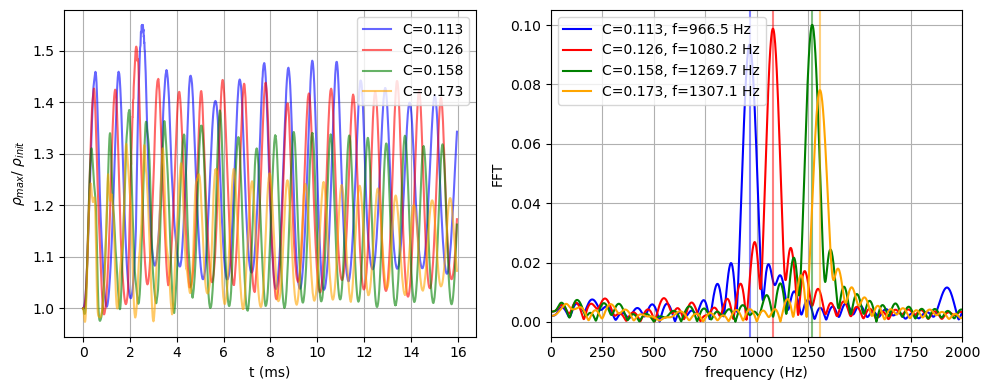

In [112]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize = (10,4))


end_time = 400
for i, BNS in enumerate(BNS_list):
    BNS.get_rho_max()
    rho_t   = BNS.rho_max.t
    rho_rho = BNS.rho_max.y
    trim_t   = rho_t[:np.sum(rho_t<end_time)] * (qq+1)*1.35 / (s_in_Msun)
    trim_rho = rho_rho[:np.sum(rho_t<end_time)]
    rho_mean = np.mean(trim_rho)
    rho_norm = (trim_rho - rho_mean) / rho_mean
    rho_dimless = trim_rho / trim_rho[0]
    axs[0].plot(trim_t*1000, rho_dimless, color = color_list[i],alpha=0.6, label = Label_list_q5_D9[i])
    
    
    from scipy.signal import lombscargle
    n = 1000
    x = trim_t
    y = rho_norm
    dxmin = np.diff(x).min()
    duration = x.ptp()
    freqs = np.linspace(1/duration, n/duration, 5*n)
    periodogram = lombscargle(x, y, freqs)
    kmax = periodogram.argmax()
    
    fmax = freqs[kmax] / (2*np.pi)
    print("%8.3f" % (freqs[kmax] / (2*np.pi),))
    
    
    axs[1].axvline(fmax, color=color_list[i], alpha=0.5)
    
    axs[1].plot(freqs / (2*np.pi), np.sqrt(4*periodogram/(5*n)), color=color_list[i]
                ,label = "C=%.3f, f=%4.1f Hz" % (Compactness_list_q5_D9[i],fmax))
    
    
axs[0].set_xlabel("t (ms)")
axs[0].set_ylabel(r"$\rho_{max}/\ \rho_{init}$")

axs[1].set_xlabel('frequency (Hz)')
axs[1].set_ylabel('FFT')
axs[1].set_xlim(0,2000)

for ax in axs:
    ax.grid()
axs[0].legend()
axs[1].legend(loc="upper left")
plt.tight_layout()

fig.savefig(save_dir + '/Ch4_q5_DensityOscillations.pdf', bbox_inches='tight')


# Time-shifts to align frequencies

initial frequency 239.1329623497788 Hz
C=0.113 738
C=0.126 794
C=0.158 812
C=0.173 813
BBH     883


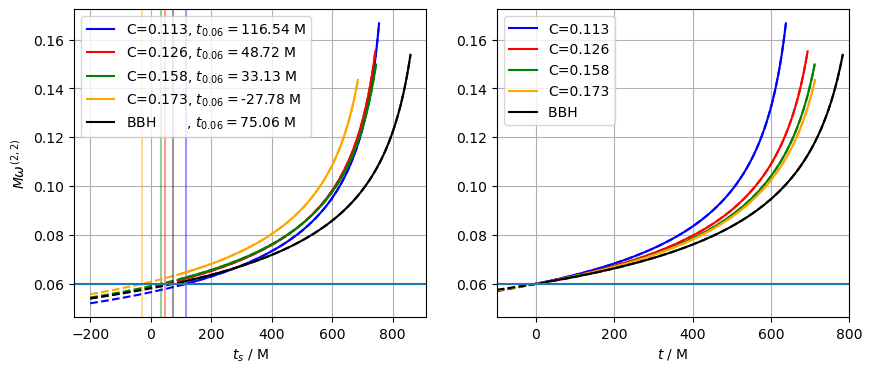

In [187]:
shift_time_list  = []
merge_time_list  = []

fig, axs = plt.subplots(ncols=2,nrows=1,figsize = (10,4))


start_freq_std = 0.06
print("initial frequency", start_freq_std / (1.35*6*4.93e-6)/(2*np.pi) , "Hz")
time_nsbh_std = []
psi4_abs_22_std = []
psi4_phase_22_std = []
psi4_real_22_std = []

psi4_abs_33_std = []
psi4_phase_33_std = []
psi4_real_33_std = []
temp_color_list = color_list
temp_color_list.append("black")

start_time_ret = 100

all_coal_list = BNS_coal_list + [BBH_coal]
for ci, all_coal in enumerate(all_coal_list):
    time_nsbh, psi4_real_22, psi4_imag_22 = all_coal_list[ci].psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
    time_nsbh, psi4_abs_22, psi4_phase_22 = all_coal_list[ci].psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    merger_time_nsbh = time_nsbh[np.argmax(psi4_abs_22)]-radius
    merge_time_list.append(merger_time_nsbh)
    ## cutting off the waveform
    #start_sample = radius+10
    start_sample = start_time_ret
    end_sample = merger_time_nsbh - 100
    sample_freq = 1001
    sample_num = int((end_sample - start_sample)*sample_freq)
    dt = (end_sample - start_sample) / (sample_num-1)
    new_t = np.arange(start_sample, end_sample, dt)
    from scipy.interpolate import interp1d  
    ph_of_t = interp1d(time_nsbh-radius, np.abs(psi4_phase_22))
    new_ph = ph_of_t(new_t) - ph_of_t(merger_time_nsbh)
    new_f = finite_difference(new_t,new_ph)

    x = np.max(new_t)-new_t
    y = (-new_ph)**(8./5)
    m,b = np.polyfit(x, y, 1)

    x_arr = np.linspace(np.min(x),np.max(x),len(x))
    ph_fit = -(m*(np.max(new_t)-new_t)+b)**(5./8)
    freq_fit = 5./8*m*(m*(np.max(new_t)-new_t)+b)**(-3./8)
    new_t_ext = np.linspace(-200,end_sample,sample_freq)
    freq_ext = 5./8*m*(m*(end_sample-new_t_ext)+b)**(-3./8)
    
    noise = new_f - freq_fit
    fit_t_of_freq = interp1d(freq_ext, new_t_ext)
    time_shift_std = fit_t_of_freq(start_freq_std)
#     ax_fit2.plot(new_t, ph_fit,color="blue")
#     ax_fit2.plot(new_t, new_ph,color="red")
    
    shift_time_list.append(float(time_shift_std))
    start_time_std = time_shift_std + 0
    
    idx_std = np.argmax(time_nsbh-radius > start_time_std)
    time_nsbh_std.append(time_nsbh[idx_std:]-radius-time_shift_std)
    psi4_abs_22_std.append(psi4_abs_22[idx_std:])
    psi4_phase_22_std.append(psi4_phase_22[idx_std:]-psi4_phase_22[idx_std])
    psi4_real_22_std.append(psi4_real_22[idx_std:])
    
    _, psi4_real_33, psi4_imag_33 = all_coal_list[ci].psi4_real_imag_for_mode(l=3, m=3, extraction_radius=radius)
    _, psi4_abs_33, psi4_phase_33 = all_coal_list[ci].psi4_amp_phase_for_mode(l=3, m=3, extraction_radius=radius)
    psi4_abs_33_std.append(psi4_abs_33[idx_std:])
    psi4_phase_33_std.append(psi4_phase_33[idx_std:]-psi4_phase_33[idx_std])
    psi4_real_33_std.append(psi4_real_33[idx_std:])
    
    if(ci < 4):
        axs[0].plot(new_t_ext,freq_ext,'--',color=color_list[ci])
        axs[0].plot(new_t,freq_fit,label = Label_list_q5_D9[ci] + r", $t_{0.06}=$%.2f M"%time_shift_std,color=color_list[ci])
        axs[1].plot(new_t_ext-time_shift_std,freq_ext,'--',color=color_list[ci])
        axs[1].plot(new_t-time_shift_std,freq_fit,label = Label_list_q5_D9[ci],color=color_list[ci])
    else:
        axs[0].plot(new_t_ext,freq_ext,'--',color=color_list[ci])
        axs[0].plot(new_t,freq_fit,label = "BBH       "+ r", $t_{0.06}=$%.2f M"%time_shift_std,color="black")
        axs[1].plot(new_t_ext-time_shift_std,freq_ext,'--',color="black")
        axs[1].plot(new_t-time_shift_std,freq_fit,label = "BBH       ",color="black")
    axs[0].axvline(x=time_shift_std, color = temp_color_list[ci], alpha = 0.4)

merger_time_labels = Label_list_q5_D9 + ["BBH    "]
for i in range(5):
    T_mx = merge_time_list[i] - shift_time_list[i] 
    print(merger_time_labels[i] + " %3.f"%T_mx)
        
axs[0].axhline(y=start_freq_std)
axs[0].legend(loc="upper left")
axs[0].set_ylabel(r"$M\omega^{(2,2)}$")
axs[0].set_xlabel(r"$t_s$ / M")
axs[0].grid()

axs[1].axhline(y=start_freq_std)
axs[1].legend(loc="upper left")
axs[1].set_xlim(-100,800)
axs[1].set_xlabel(r"$t$ / M")
axs[1].grid()

fig.savefig(save_dir + "Ch4_q5_frequency_std.pdf", bbox_inches='tight')

# (2,2) waveforms

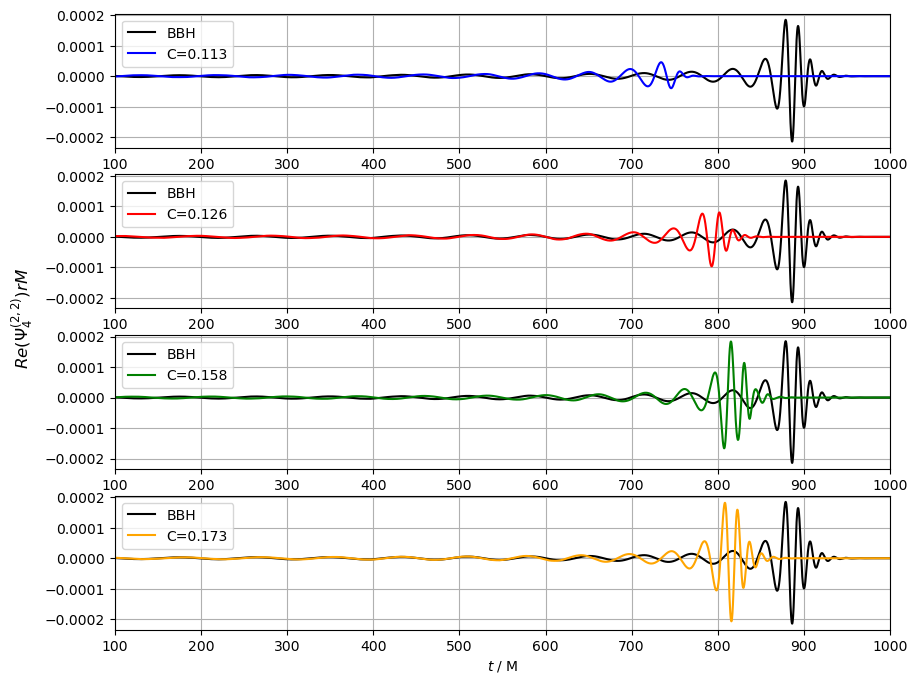

In [160]:
fig, ax = plt.subplots(4,figsize = (10,8))
for ci, all_coal in enumerate(all_coal_list):
    if(ci < 4):
        ax[ci].plot(time_nsbh_std[4], psi4_real_22_std[4],label = "BBH",color="black")
        ax[ci].plot(time_nsbh_std[ci], psi4_real_22_std[ci],label = Label_list_q5_D9[ci],color=color_list[ci])
    
for i in range(4):
    ax[i].set_xlim(start_time_ret,1000)
    ax[i].grid()
    ax[i].set_yticks(ticks=np.arange(-2,3,1)*0.0001)
    ax[i].set_xlabel(t_label)
    ax[i].legend(loc='upper left')
fig.supylabel(r"$Re(\Psi_4^{(2,2)})rM$")
fig.savefig(save_dir + 'Ch4_q5_Psi4Plots.pdf', bbox_inches='tight')

# (3,3) waveforms

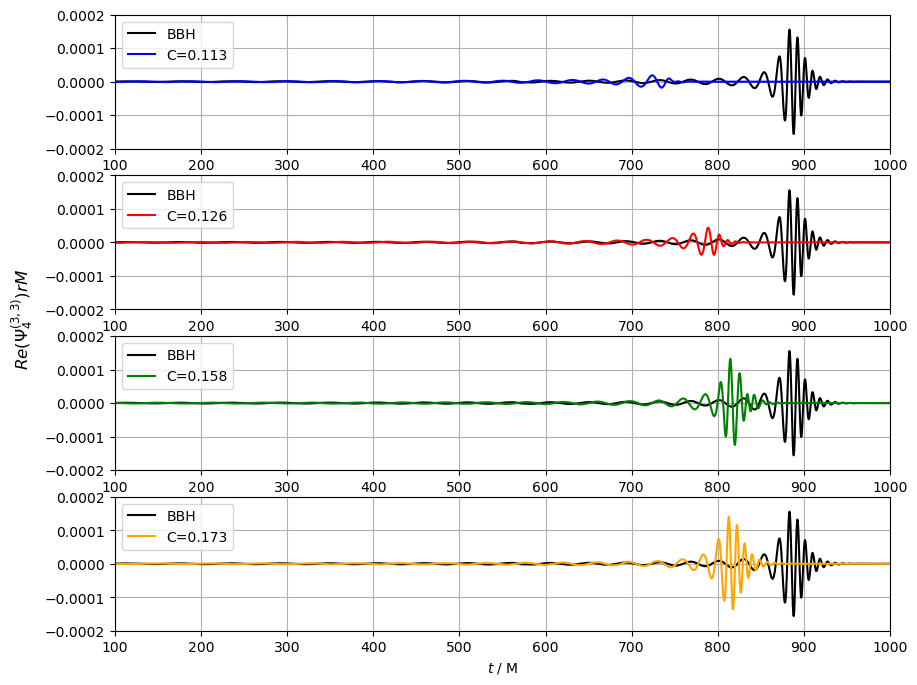

In [161]:
fig, ax = plt.subplots(4,figsize = (10,8))
for ci, all_coal in enumerate(all_coal_list):
    if(ci < 4):
        ax[ci].plot(time_nsbh_std[4], psi4_real_33_std[4],label = "BBH",color="black")
        ax[ci].plot(time_nsbh_std[ci], psi4_real_33_std[ci],label = Label_list_q5_D9[ci],color=color_list[ci])
        
    
for i in range(4):
    ax[i].set_xlim(start_time_ret,1000)
    ax[i].grid()
    ax[i].set_yticks(ticks=np.arange(-2,3,1)*0.0001)
    ax[i].set_xlabel(t_label)
    ax[i].legend(loc='upper left')
fig.supylabel(r"$Re(\Psi_4^{(3,3)})rM$")
fig.savefig(save_dir + 'Ch4_q5_Psi4Plots_33.pdf', bbox_inches='tight')

# Aligned waveforms

BBH merge at 958.551724 M
NSBH merge at 854.827586 M, sooner than BBH at 103.724138 M
NSBH merge at 842.513103 M, sooner than BBH at 116.038621 M
NSBH merge at 844.896552 M, sooner than BBH at 113.655172 M
NSBH merge at 785.045517 M, sooner than BBH at 173.506207 M


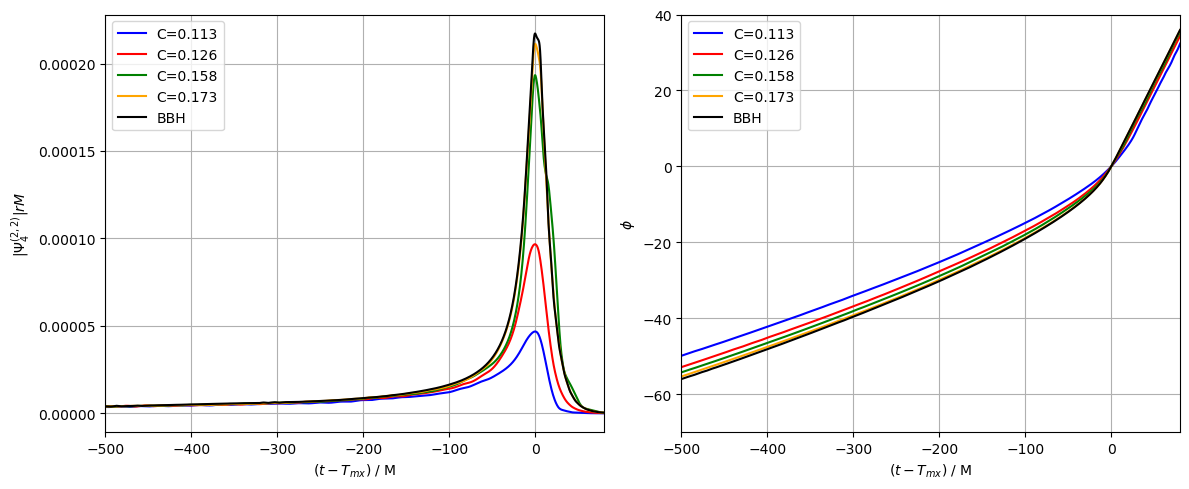

In [162]:
fig_all, ax_all = plt.subplots(ncols=2,nrows=1,figsize = (12,5))

tmin,tmax= -500, 80

time_bbh, bbh_psi4_real_22, bbh_psi4_imag_22 = BBH_coal.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
time_bbh, bbh_psi4_amp_22, bbh_psi4_phase_22 = BBH_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
merger_time_bbh = 0

merger_time_bbh = merge_time_list[4]
bbh_psi4_phase_22_aligned = bbh_psi4_phase_22 - bbh_psi4_phase_22[np.argmax(bbh_psi4_amp_22)]
print("BBH merge at %f M" % merger_time_bbh)

for i, BNS_coal in enumerate(BNS_coal_list):
    time_nsbh, psi4_real_22, psi4_imag_22  = BNS_coal.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
    time_nsbh, psi4_amp_22,  psi4_phase_22 = BNS_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    merger_time_nsbh = 0
    
    merger_time_nsbh = merge_time_list[i]
    psi4_phase_22_aligned = psi4_phase_22 - psi4_phase_22[np.argmax(psi4_amp_22)]
    print("NSBH merge at %f M, sooner than BBH at %f M" % (merger_time_nsbh, merger_time_bbh- merger_time_nsbh))
        
    
    time_nsbh_retarded = time_nsbh - radius
    time_nsbh_merger   = time_nsbh - merger_time_nsbh
    
    ax_all[0].plot(time_nsbh - merger_time_nsbh-radius,psi4_amp_22,color=color_list[i],label=Label_list_q5_D9[i])
    ax_all[1].plot(time_nsbh - merger_time_nsbh-radius,psi4_phase_22_aligned,color=color_list[i],label=Label_list_q5_D9[i])

   
ax_all[0].plot(time_bbh - merger_time_bbh-radius,bbh_psi4_amp_22,color='black',label="BBH")
ax_all[1].plot(time_bbh - merger_time_bbh-radius,bbh_psi4_phase_22_aligned,color='black',label="BBH")
time_bbh_retarded = time_bbh - radius
time_bbh_merger   = time_bbh - merger_time_bbh

ax_all[0].legend()
ax_all[0].grid()
ax_all[1].legend()
ax_all[1].grid()
ax_all[1].set_xlim(tmin,tmax)
ax_all[1].set_ylim(-70,40)
ax_all[0].set_xlim(tmin,tmax)
ax_all[0].set_xlabel(t_merger_label)
ax_all[1].set_xlabel(t_merger_label)
ax_all[0].set_ylabel(r"$|\Psi_4^{(2,2)}| rM$")
ax_all[1].set_ylabel(r"$\phi$")
plt.tight_layout()
fig_all.savefig(save_dir + 'Ch4_q5_amp_phase_aligned_all.pdf', bbox_inches='tight')

# Critical Mass ratio curve

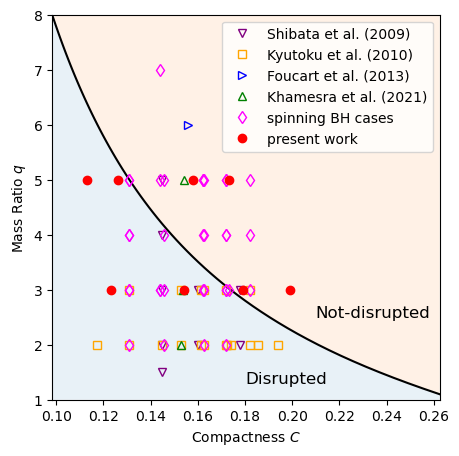

In [15]:
import numpy as np
import scipy as sp
from scipy import optimize
def lhs(C_,q_):
    return 0.270*C_**(3./2) * np.sqrt((1 + q_)**3/q_)
def rhs(C_,q_):
    return 0.0680*(1 - 0.444/q_**(1./4))*(1 - 3.54*C_**(1./3))

q_arr = np.arange(1.1,8.1,0.1)
C_arr = np.zeros_like(q_arr)
for i,q in enumerate(q_arr):
    def solve(C):
        return 0.270*C**1.5 * np.sqrt((1 + q)**3/q) - 0.0680*(1 - 0.444*q**(-0.25)*(1 - 3.54*C**(1./3)))
    C_arr[i] = optimize.newton(solve, 0.1)
    
    
q_study       = np.array([[0.1529,2],
                          [0.1536,3],
                          [0.1543,5]])
C_study_1     = np.array([[0.123 ,3],
                          [0.154 ,3],
                          [0.179 ,3],
                          [0.199 ,3]])
C_study_2     = np.array([[0.113 ,5],
                          [0.126 ,5],
                          [0.158 ,5],
                          [0.173 ,5]])

# https://arxiv.org/abs/1008.1460
Kyutoku_2010  = np.array([[0.1309,2],
                          [0.1624,2],
                          [0.1718,2],
                          [0.1723,2],
                          [0.1741,2],
                          [0.1819,2],
                          [0.1856,2],
                          [0.1940,2],
                          [0.1309,3],
                          [0.1624,3],
                          [0.1718,3],
                          [0.1819,3],
                          [0.1172,2],
                          [0.1447,2],
                          [0.1527,2],
                          [0.1614,2],
                          [0.1527,3],
                          [0.1614,3],
                          ])

# https://arxiv.org/abs/0902.0416
Shibata_2009  = np.array([[0.145,1.5],
                          [0.145,2],
                          [0.160,2],
                          [0.178,2],
                          [0.145,3],
                          [0.160,3],
                          [0.178,3],
                          [0.145,4],
                          [0.145,5],
                         ])

# https://arxiv.org/abs/1307.7685
# https://arxiv.org/abs/1903.09166 #q<1
Foucart_2013  = np.array([[0.156,6],])

#spinning cases

# https://arxiv.org/abs/1207.6304
# [8]  https://arxiv.org/abs/1108.1189
# [9]  https://arxiv.org/abs/0812.2245
# [10] https://arxiv.org/abs/1212.4810
# [11] https://arxiv.org/abs/1007.4203
Foucart_2012_s  = np.array([[0.144,7],
                            [0.144,5],
                            [0.144,3],
                            [0.131,5],
                            [0.162,5],
                            [0.162,5],
                            [0.172,5],
                            [0.182,5],
                            [0.131,4],
                            [0.162,4],
                            [0.172,4],
                            [0.182,4],
                            [0.131,3],
                            [0.162,3],
                            [0.172,3],
                            [0.182,3],
                           ])
Duez_2009_s  = np.array([[0.144,3],
                         [0.173,3],
                        ]) 

# [8]  https://arxiv.org/abs/1108.1189
Shibata_2009_s = np.zeros((16,2))

Shibata_C = [0.1309,0.1456,0.1624,0.1718]
Shibata_Q = [2,3,4,5]
for i in range(4):
    for j in range(4):
        Shibata_2009_s[i+j*4,0] = Shibata_C[i]
        Shibata_2009_s[i+j*4,1] = Shibata_Q[j]




fig = plt.figure(figsize = (5,5))
ax = fig.gca()
ax.plot(C_arr,q_arr,color='black')
ax.fill_between(C_arr, q_arr, 1,alpha = 0.1)
ax.fill_between(C_arr, 10,q_arr,alpha = 0.1)

alpha_data = 1.0
markersize_data = 6

ax.plot(np.transpose(Shibata_2009)[0],np.transpose(Shibata_2009)[1],'v',\
        color='purple',alpha = alpha_data,markersize = markersize_data, markerfacecolor='none', label='Shibata et al. (2009)')
ax.plot(np.transpose(Kyutoku_2010)[0],np.transpose(Kyutoku_2010)[1],'s',\
        color='orange'  ,alpha = alpha_data,markersize = markersize_data, markerfacecolor='none', label='Kyutoku et al. (2010)')
ax.plot(np.transpose(Foucart_2013)[0],np.transpose(Foucart_2013)[1],'>',\
        color='blue' ,alpha = alpha_data,markersize = markersize_data, markerfacecolor='none', label='Foucart et al. (2013)')
ax.plot(np.transpose(q_study     )[0],np.transpose(q_study     )[1],'^',\
        color='green' ,alpha = alpha_data,markersize = markersize_data, markerfacecolor='none', label='Khamesra et al. (2021)')

ax.plot(np.transpose(Foucart_2012_s)[0],np.transpose(Foucart_2012_s)[1],'d',\
        color='magenta' ,alpha = alpha_data,markersize = markersize_data, markerfacecolor='none')
ax.plot(np.transpose(Duez_2009_s)[0],np.transpose(Duez_2009_s)[1],'d',\
        color='magenta' ,alpha = alpha_data,markersize = markersize_data, markerfacecolor='none', label='spinning BH cases')
ax.plot(np.transpose(Shibata_2009_s)[0],np.transpose(Shibata_2009_s)[1],'d',\
        color='magenta' ,alpha = alpha_data,markersize = markersize_data, markerfacecolor='none')



ax.plot(np.transpose(C_study_1   )[0],np.transpose(C_study_1   )[1],'o',\
        color='red'   ,alpha = alpha_data,markersize = markersize_data)
ax.plot(np.transpose(C_study_2   )[0],np.transpose(C_study_2   )[1],'o',\
        color='red'   ,alpha = alpha_data,markersize = markersize_data, label='present work')


ax.set_xlim(np.min(C_arr),np.max(C_arr))
ax.set_ylim(1,8)
ax.set_xlabel(r"Compactness $C$")
ax.set_ylabel(r"Mass Ratio $q$")

ax.text(0.21,2.5  ,"Not-disrupted"          ,fontsize="large")
ax.text(0.18,1.3,"Disrupted",fontsize="large")
ax.legend()
fig.savefig(save_dir + 'Ch1_QC_Curve.pdf', bbox_inches='tight')

# Final BH

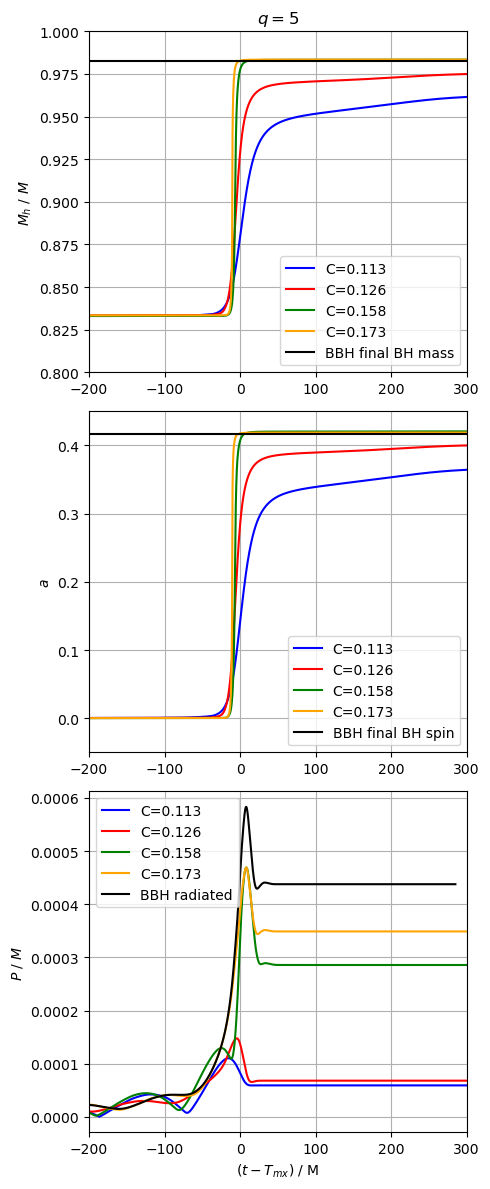

In [164]:
fig, ax = plt.subplots(ncols=1,nrows=3,figsize = (5,12))

for i, BNS_coal in enumerate(BNS_coal_list):
    t_M, M_1 = BNS_coal.compact_objects[0].horizon_mass
    dM_1 = finite_difference(t_M, M_1)
    ax[0].plot(t_M-merge_time_list[i], M_1,color=color_list[i],label = Label_list_q5_D9[i])
    
tM_BH1, M_BH1 = BBH_coal.compact_objects[0].horizon_mass
tM_BH2, M_BH2 = BBH_coal.final_compact_object.horizon_mass



ax[0].axhline(M_BH2[-1],color="black",label = "BBH final BH mass")
ax[0].set_ylim(4.8/6.0,1.0)
ax[0].set_xlim(-200,300)
# ax[0].set_xlabel(r"$(\bar{t}-T_{mx})$ / $M$")
ax[0].set_ylabel(r"$M_{h}$ / $M$")
ax[0].legend()
ax[0].set_title(r"$q=5$")
ax[0].grid()

for i, BNS_coal in enumerate(BNS_coal_list):
    t_S, S_1 = BNS_coal.compact_objects[0].dimensionless_spin_vector
    dS_1 = np.zeros_like(S_1)
    for xyz in range(3):
        dS_1[:,xyz] = finite_difference(t_S, S_1[:,xyz])
    S_1_mag = np.sqrt(S_1[:,0]**2 + S_1[:,1]**2 + S_1[:,2]**2)
    ax[1].plot(t_S-merge_time_list[i], S_1_mag,color=color_list[i],label = Label_list_q5_D9[i])
    
tS_BH1, S_BH1 = BBH_coal.compact_objects[0].dimensionless_spin_vector
tS_BH2, S_BH2 = BBH_coal.final_compact_object.dimensionless_spin_vector

ax[1].axhline(S_BH2[-1,2],color="black",label = "BBH final BH spin")
ax[1].set_ylim(-0.05,0.45)
ax[1].set_xlim(-200,300)
# ax[1].set_xlabel(r"$(\bar{t}-T_{mx})$ / $M$")
ax[1].set_ylabel(r"$a$")
ax[1].legend()
ax[1].grid()

radius = 130
for i, BNS_coal in enumerate(BNS_coal_list):
    t_P, P_vec = BNS_coal.linear_momentum_radiated(extraction_radius=radius)
    P_1 = np.sqrt(np.sum(P_vec**2,axis=1))
    dP_vec = np.zeros_like(P_vec)
    for xyz in range(3):
        dP_vec[:,xyz] = finite_difference(t_P, P_vec[:,xyz])
    dP_1 = np.sqrt(np.sum(dP_vec**2,axis=1))
    ax[2].plot(t_P-merge_time_list[i]-radius, P_1,color=color_list[i],label = Label_list_q5_D9[i])
    
    
tP_BH, P_BH_vec = BBH_coal.linear_momentum_radiated(extraction_radius=130)
P_BH = np.sqrt(np.sum(P_BH_vec**2,axis=1))
dP_BH_vec = np.zeros_like(P_BH_vec)
for xyz in range(3):
    dP_BH_vec[:,xyz] = finite_difference(tP_BH, P_BH_vec[:,xyz])
dP_BH = np.sqrt(np.sum(dP_BH_vec**2,axis=1))
ax[2].plot(tP_BH-merge_time_list[4]-radius, P_BH, color="black",label = "BBH radiated")
ax[2].set_xlim(-200,300)
ax[2].set_xlabel(t_merger_label)
ax[2].set_ylabel(r"$P$ / $M$")
ax[2].legend()
ax[2].grid()

fig.tight_layout()
fig.savefig(save_dir + 'Ch4_q5_BH_MassPlots.pdf', bbox_inches='tight')

# Post-merger signals (quasi-normal ringing)

0.113 & 0.429 & 10.5 & 0.444 & 10.1 & 0.459 & 10.6 \\
0.126 & 0.420 & 10.4 & 0.449 & 11.0 & 0.718 & 10.7 \\
0.158 & 0.434 & 12.3 & 0.452 & 11.1 & 0.724 & 11.0 \\
0.173 & 0.417 & 11.2 & 0.451 & 11.3 & 0.722 & 11.0 \\


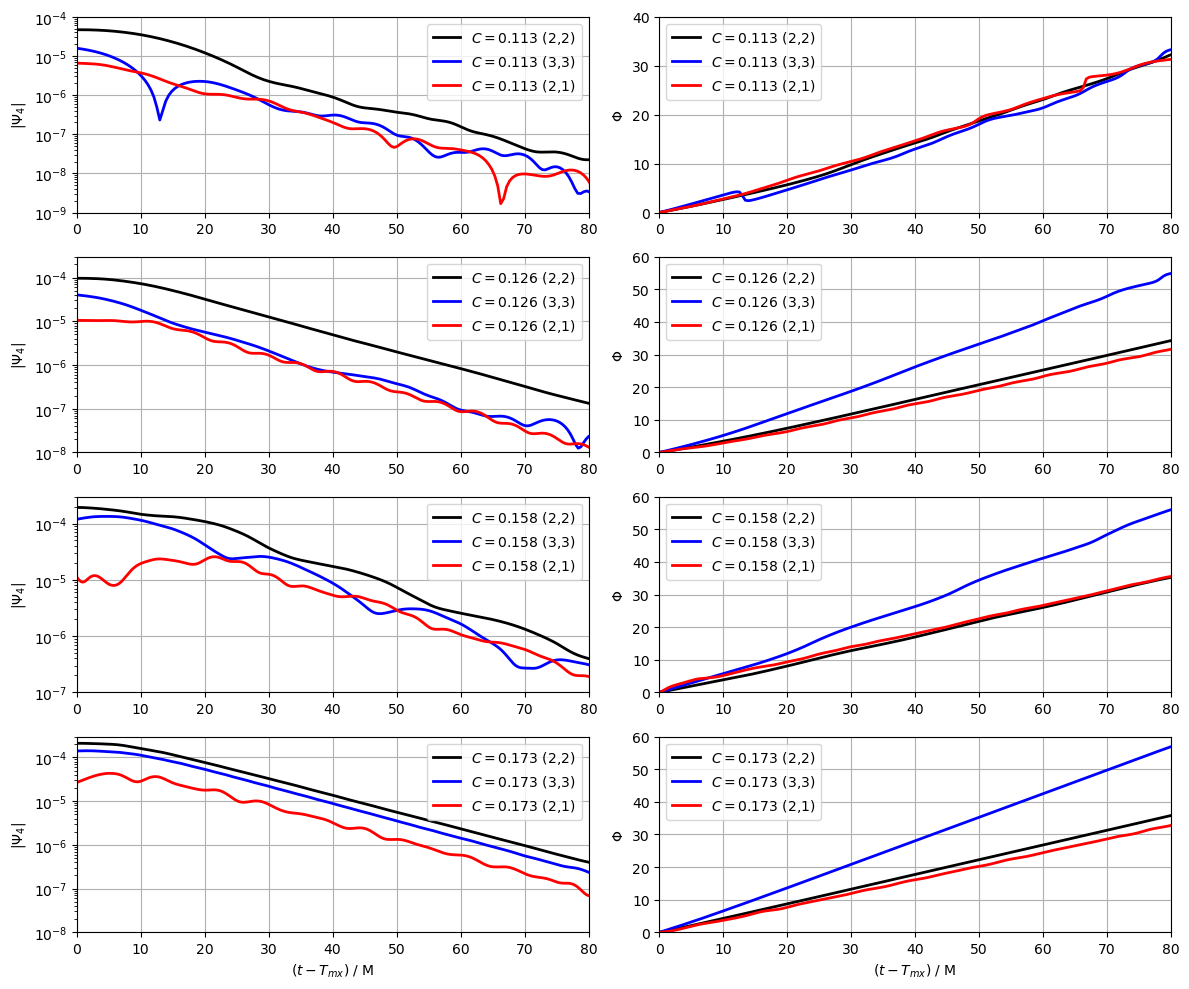

In [172]:
##quasi-normal ringing
from scipy import stats
fig, ax = plt.subplots(ncols=2,nrows=4,figsize = (12,10))
align = False
for i in [0,1,2,3]:
    BNS_coal = BNS_coal_list[i]
    time_nsbh, psi4_real_22, psi4_imag_22 = BNS_coal.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
    psi4_abs_22 = np.sqrt(psi4_real_22**2 + psi4_imag_22**2)
    merger_idx = np.argmax(psi4_abs_22)
    merger_time = time_nsbh[merger_idx]
    time_21, psi4_amp_21, psi4_phase_21 = BNS_coal.psi4_amp_phase_for_mode(l=2, m=1, extraction_radius=radius)
    time_22, psi4_amp_22, psi4_phase_22 = BNS_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    time_33, psi4_amp_33, psi4_phase_33 = BNS_coal.psi4_amp_phase_for_mode(l=3, m=3, extraction_radius=radius)
    x_21, y_21, z_21 = time_21[merger_idx:]-merger_time, psi4_amp_21[merger_idx:], psi4_phase_21[merger_idx:] - psi4_phase_21[merger_idx]
    x_22, y_22, z_22 = time_22[merger_idx:]-merger_time, psi4_amp_22[merger_idx:], psi4_phase_22[merger_idx:] - psi4_phase_22[merger_idx]
    x_33, y_33, z_33 = time_33[merger_idx:]-merger_time, psi4_amp_33[merger_idx:], psi4_phase_33[merger_idx:] - psi4_phase_33[merger_idx]

    ## fit the quasinormal modes
    fit_start = np.argmax(x_21 > 20)
    fit_end   = np.argmax(x_21 > 80)
  
    y_res_22 = stats.linregress(x_22[fit_start:fit_end], np.log(y_22[fit_start:fit_end]))
    y_res_33 = stats.linregress(x_33[fit_start:fit_end], np.log(y_33[fit_start:fit_end]))
    y_res_21 = stats.linregress(x_21[fit_start:fit_end], np.log(y_21[fit_start:fit_end]))
    
    z_res_22 = stats.linregress(x_22[fit_start:fit_end], z_22[fit_start:fit_end])
    z_res_33 = stats.linregress(x_33[fit_start:fit_end], z_33[fit_start:fit_end])
    z_res_21 = stats.linregress(x_21[fit_start:fit_end], z_21[fit_start:fit_end])
    
    
    ax[i,0].plot(x_22,y_22,color="black"   , label=r"$C=$%.3f (2,2)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,0].plot(x_33,y_33,color="blue"    , label=r"$C=$%.3f (3,3)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,0].plot(x_21,y_21,color="red"     , label=r"$C=$%.3f (2,1)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,1].plot(x_22,z_22,color="black"   , label=r"$C=$%.3f (2,2)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,1].plot(x_33,z_33,color="blue"    , label=r"$C=$%.3f (3,3)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,1].plot(x_21,z_21,color="red"     , label=r"$C=$%.3f (2,1)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)

#     print(r"C=%.3f tau=%f omega=%f"% (Compactness_list_q5_D9[i],-1/y_res_22.slope,z_res_22.slope))
    print("%.3f & %.3f & %.1f & %.3f & %.1f & %.3f & %.1f \\\\" %
          (Compactness_list_q5_D9[i],\
           z_res_21.slope, -1/y_res_21.slope,\
           z_res_22.slope, -1/y_res_22.slope,\
           z_res_33.slope, -1/y_res_33.slope))
ymin_1 = [1e-9, 1e-8, 1e-7, 1e-8]
ymax_1 = [1e-4, 3e-4, 3e-4, 3e-4]
ymax_2 = [40, 60, 60, 60]
for i in range(4):
    ax[i,0].set_xlim(0,80)
    ax[i,1].set_xlim(0,80)
    ax[i,0].set_ylim(ymin_1[i], ymax_1[i])
    ax[i,1].set_ylim(0,ymax_2[i])
    ax[i,0].set_yscale("log")
    ax[i,0].grid()
    ax[i,1].grid()
#     ax[i].set_yticks(ticks=np.arange(-2,3,1)*0.0001)

    if(i==3):
        ax[i,0].set_xlabel(t_merger_label)
        ax[i,1].set_xlabel(t_merger_label)
    
    ax[i,0].set_ylabel(r"$|\Psi_4|$")
    ax[i,1].set_ylabel(r"$\Phi$")
    ax[i,0].legend(loc='upper right')
    ax[i,1].legend(loc='upper left')

# plt.suptitle(r"Post merger signals ($q=5$)",y=1.0)
plt.tight_layout()
fig.savefig(save_dir + "Ch4_q5_QNMFitting_NSBH.pdf", bbox_inches='tight')

# E, J, P radiated

In [169]:
cutoff_time = 250
cutoff_time_bbh=140


t_Mh_bbh, Mh_bbh = BBH_coal.final_compact_object.horizon_mass
t_Mi_bbh, Mi_bbh = BBH_coal.final_compact_object.irreducible_mass

t_E_bbh, E_bbh =  BBH_coal.energy_radiated(           extraction_radius = radius)
t_J_bbh, Ji_bbh = BBH_coal.angular_momentum_radiated( extraction_radius = radius)
t_P_bbh, Pi_bbh = BBH_coal.linear_momentum_radiated(  extraction_radius = radius)

J_bbh = np.sqrt(np.sum(Ji_bbh**2,axis=1))
P_bbh = np.sqrt(np.sum(Pi_bbh**2,axis=1))

# use interpolation
E_bbh_f = (interp1d(t_E_bbh,E_bbh))(merge_time_list[4] + radius + cutoff_time_bbh)
J_bbh_f = (interp1d(t_J_bbh,J_bbh))(merge_time_list[4] + radius + cutoff_time_bbh)
P_bbh_f = (interp1d(t_P_bbh,P_bbh))(merge_time_list[4] + radius + cutoff_time_bbh)

Mh_bbh_f = BBH_coal.final_compact_object.horizon_mass_at_time(    merge_time_list[4] + cutoff_time)
Mi_bbh_f = BBH_coal.final_compact_object.irreducible_mass_at_time(merge_time_list[4] + cutoff_time)
ai_bbh_f = BBH_coal.final_compact_object.dimensionless_spin_at_time(merge_time_list[4] + cutoff_time)
ji_bbh_f = BBH_coal.final_compact_object.dimensional_spin_at_time(merge_time_list[4] + cutoff_time)

V_bbh_f = P_bbh_f / Mh_bbh_f
# print("            Mirr    az      E_rad   J_rad    v_k")
# print("BBH         %.4f & %.4f &        & %.4f & %.4f & %.4f & %.2f\\\\" %
#           (merge_time_list[4] - shift_time_list[4], Mh_bbh_f, ai_bbh_f[2],\
#            E_bbh_f,J_bbh_f,V_bbh_f*c/1000))

print("C     &   MT   &   Mh   &  Mej     &  Erad  & JT     &  a     &  Jrad  & vk")
# print("BBH         %.4f & %.4f & %.4f &        & %.4f & %.4f & %.4f & %.2f\\\\" %
#           (merge_time_list[4] - shift_time_list[4], Mh_bbh_f, ai_bbh_f[2],\
#            E_bbh_f,J_bbh_f,V_bbh_f*c/1000))
print("BBH   & %.3f & %.3f & %.2e & %.4f & %.3f & %.3f & %.3f & %.1f \\\\" % \
              ((Mh_bbh_f+0+E_bbh_f),Mh_bbh_f, 0,E_bbh_f,\
               (ji_bbh_f[2]+J_bbh_f),ai_bbh_f[2],J_bbh_f,\
               V_bbh_f*c/1000))

for i, BNS_coal in enumerate(BNS_coal_list):
    t_Mh_nsbh, Mh_nsbh   = BNS_coal.compact_objects[0].horizon_mass
    t_Mi_nsbh, Mi_nsbh   = BNS_coal.compact_objects[0].irreducible_mass

    t_E_nsbh, E_nsbh  = BNS_coal.energy_radiated(extraction_radius = radius)
    t_J_nsbh, Ji_nsbh = BNS_coal.angular_momentum_radiated(extraction_radius = radius)
    t_P_nsbh, Pi_nsbh = BNS_coal.linear_momentum_radiated(extraction_radius=radius)

    J_nsbh = np.sqrt(np.sum(Ji_nsbh**2,axis=1))
    P_nsbh = np.sqrt(np.sum(Pi_nsbh**2,axis=1))

    # use interpolation
    E_nsbh_f = (interp1d(t_E_nsbh,E_nsbh))(merge_time_list[i] + radius + cutoff_time)
    J_nsbh_f = (interp1d(t_J_nsbh,J_nsbh))(merge_time_list[i] + radius + cutoff_time)
    P_nsbh_f = (interp1d(t_P_nsbh,P_nsbh))(merge_time_list[i] + radius + cutoff_time)

    Mh_nsbh_f = BNS_coal.compact_objects[0].horizon_mass_at_time(    merge_time_list[4] + cutoff_time)
    Mi_nsbh_f = BNS_coal.compact_objects[0].irreducible_mass_at_time(merge_time_list[4] + cutoff_time)
    ai_nsbh_f = BNS_coal.compact_objects[0].dimensionless_spin_at_time(merge_time_list[4] + cutoff_time)
    ji_nsbh_f = BNS_coal.compact_objects[0].dimensional_spin_at_time(merge_time_list[4] + cutoff_time)
    
    V_nsbh_f = P_nsbh_f / Mh_nsbh_f
    
    volint_filename        = sim_dir + run_dir_list[i] + "/concatenated/volume_integrals-GRMHD.asc"
    with open(volint_filename,'r') as volint_file:
        volint_data = np.genfromtxt(volint_filename)
        t_vol  = volint_data[:,0]
        m_out_35   = volint_data[:,10] * 2 #rest mass multiply by 2 for symmetry
        m_in_ns   = volint_data[:,5] * 2 #rest mass multiply by 2 for symmetry
        M0 = m_in_ns[0]
        m_td_of_t = interp1d(t_vol, (m_out_35 - m_out_35[0]))
        M_td_f = m_td_of_t(merge_time_list[i] + 35 + cutoff_time) 
    
    print("%.3f & %.3f & %.3f & %.2e & %.4f & %.3f & %.3f & %.3f & %.1f \\\\" % \
              (Compactness_list_q5_D9[i],\
               (Mh_nsbh_f+M_td_f+E_nsbh_f),Mh_nsbh_f, M_td_f,E_nsbh_f,\
               (ji_nsbh_f[2]+J_nsbh_f),ai_nsbh_f[2],J_nsbh_f,\
               V_nsbh_f*c/1000))

C     &   MT   &   Mh   &  Mej     &  Erad  & JT     &  a     &  Jrad  & vk
BBH   & 0.994 & 0.982 & 0.00e+00 & 0.0116 & 0.523 & 0.416 & 0.121 & 133.5 \\
0.113 & 0.973 & 0.962 & 6.16e-03 & 0.0042 & 0.413 & 0.367 & 0.074 & 18.4 \\
0.126 & 0.989 & 0.975 & 7.17e-03 & 0.0062 & 0.470 & 0.401 & 0.088 & 20.9 \\
0.158 & 0.994 & 0.983 & 2.11e-05 & 0.0102 & 0.517 & 0.421 & 0.110 & 87.1 \\
0.173 & 0.994 & 0.983 & 1.48e-04 & 0.0108 & 0.516 & 0.419 & 0.111 & 106.3 \\


In [146]:
shift_time_list

[116.5398387494487,
 48.722906459802125,
 33.12661744479741,
 -27.783446399547206,
 75.05529824055128]

 958.592
1076.376
1269.554
1311.221


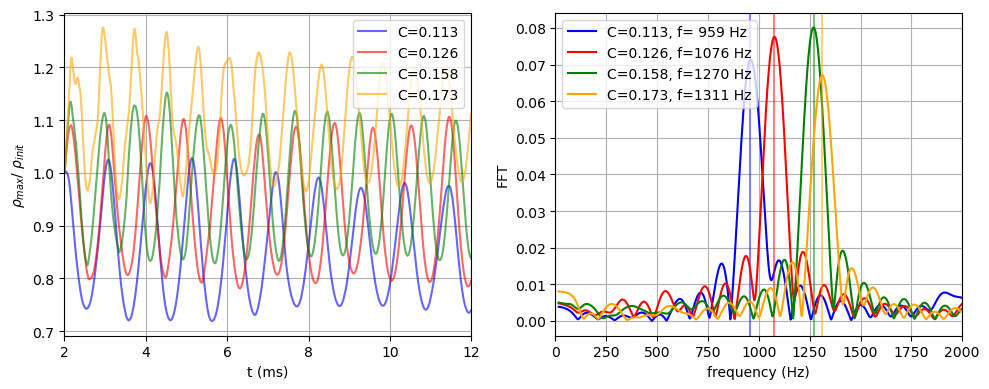

In [155]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize = (10,4))
start_time = 2. / 1000 / ((qq+1)*1.35 / (s_in_Msun) )
end_time   = 12./ 1000 / ((qq+1)*1.35 / (s_in_Msun) )
for i, BNS in enumerate(BNS_list):
    BNS.get_rho_max()
    rho_t   = BNS.rho_max.t
    rho_rho = BNS.rho_max.y
    rho_t_s = rho_t - shift_time_list[i]
    trim_t   = (rho_t_s[np.sum(rho_t_s<start_time):np.sum(rho_t_s<end_time)]) * (qq+1)*1.35 / (s_in_Msun) 
    
    trim_rho = rho_rho[np.sum(rho_t_s<start_time):np.sum(rho_t_s<end_time)]
    rho_mean = np.mean(trim_rho)
    rho_norm = (trim_rho - rho_mean) / rho_mean
    rho_dimless = trim_rho / trim_rho[0]
    axs[0].plot(trim_t*1000, rho_dimless, color = color_list[i],alpha=0.6, label = Label_list_q5_D9[i])
    
    
    from scipy.signal import lombscargle
    n = 1000
    x = trim_t
    y = rho_norm
    dxmin = np.diff(x).min()
    duration = x.ptp()
    freqs = np.linspace(1/duration, n/duration, 5*n)
    periodogram = lombscargle(x, y, freqs)
    kmax = periodogram.argmax()
    
    fmax = freqs[kmax] / (2*np.pi)
    print("%8.3f" % (freqs[kmax] / (2*np.pi),))
    
    
    axs[1].axvline(fmax, color=color_list[i], alpha=0.5)
    
    axs[1].plot(freqs / (2*np.pi), np.sqrt(4*periodogram/(5*n)), color=color_list[i]
                ,label = "C=%.3f, f=%4.0f Hz" % (Compactness_list_q5_D9[i],fmax))
    
axs[0].set_xlim(2,12)
axs[0].set_xlabel("t (ms)")
axs[0].set_ylabel(r"$\rho_{max}/\ \rho_{init}$")

axs[1].set_xlabel('frequency (Hz)')
axs[1].set_ylabel('FFT')
axs[1].set_xlim(0,2000)

for ax in axs:
    ax.grid()
axs[0].legend()
axs[1].legend(loc="upper left")

plt.tight_layout()

fig.savefig(save_dir + 'Ch4_q5_DensityOscillations.pdf', bbox_inches='tight')


Total frames available rho_xy =  318


/tmp/ipykernel_3468871/3042047530.py:63: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  xlabel="x / M"*xlabel_show[ii,jj],ylabel="y / M"*ylabel_show[ii,jj],


Total frames available rho_xy =  276
time elapsed 9.930738 sec


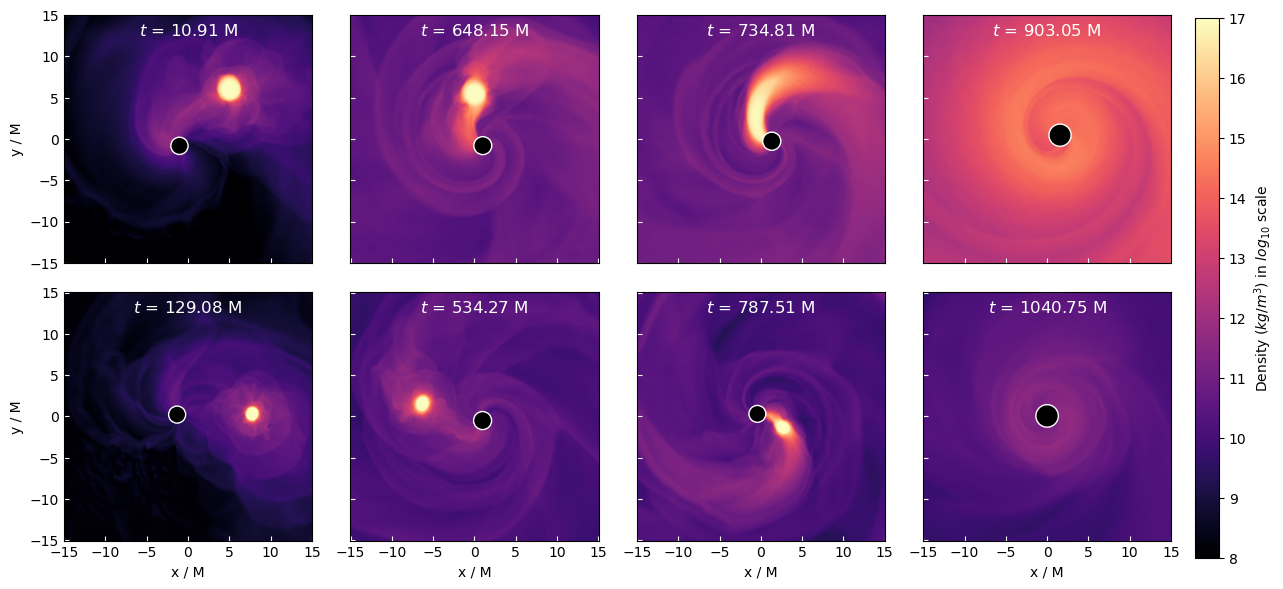

In [156]:
fig, axes = plt.subplots(ncols=4,nrows=2,figsize=(12,6))



import kuibit.visualize_matplotlib as viz
import time
from scipy.interpolate import CubicSpline
    

box_size = 15
resolution = 400

start_time = time.time()

colorbar_show = np.array([[False, False, False, True],
                          [False, False, False, True]])
xlabel_show   = np.array([[False, False, False, False],
                          [True , True , True , True]])
ylabel_show   = np.array([[True , False, False, False],
                          [True , False, False, False]])

it_BNS_list = [0,3]
for ii in range(2):
    it_BNS = it_BNS_list[ii]
    var_name = "rho"
    rho = BNS_list[it_BNS].sim.gf.xy[var_name]
    alp = BNS_list[it_BNS].sim.gf.xy["alp"]
    rho_xy_it_avail = rho.available_iterations
    it_use = [[rho_xy_it_avail[25],rho_xy_it_avail[150],rho_xy_it_avail[167],rho_xy_it_avail[200]],
              [rho_xy_it_avail[20],rho_xy_it_avail[100],rho_xy_it_avail[150],rho_xy_it_avail[200]]]
    print("Total frames available rho_xy = ", len(rho_xy_it_avail))

    compactness = Compactness_list_q5_D9[it_BNS]

    cobj_bh = BNS_coal_list[it_BNS].compact_objects[0]
    cobj_ns = BNS_coal_list[it_BNS].compact_objects[1]

    t_BH, pos_BH = cobj_bh.position_vector
    t_NS, pos_NS = cobj_ns.position_vector


    data1 = cobj_bh._get_data_from_columns([cobj_bh.Column.TIME,cobj_bh.Column.MEAN_RADIUS])
    t_R, R_BH = data1[:,0], data1[:,1] #MEAN_RADIUS
    R_BH_spline = CubicSpline(t_R,R_BH)
    R_mean_arr = R_BH_spline(t_BH)
    for jj in range(4):
        it_2D = it_use[ii][jj]
        rho_xy = rho[it_2D]
        # if no symmetry
        rho_xy_unif = rho_xy.to_UniformGridData(shape=[resolution,resolution], 
                                                x0=[-box_size,-box_size], x1=[box_size,box_size], 
                                                resample=True)

        ## plot in cgs units
        #Msun = 1.98892e30 #kg
        rho_Msun = 6.17595e20 # kg/m^3
        t_Msun   = 4.9255e-6  # s
        M_tot = 1.35*6        # Msun
        rho_scale = 1.0/(M_tot**2)*rho_Msun
        t_scale   = M_tot * t_Msun*1000
        pt = viz.plot_color(rho_xy_unif * rho_scale,
                            logscale=True,colorbar=False,
                            xlabel="x / M"*xlabel_show[ii,jj],ylabel="y / M"*ylabel_show[ii,jj],
                            cmap='magma'
                            ,vmin=np.round(-11+np.log10(rho_scale))
                            ,vmax=np.round(-2 +np.log10(rho_scale))
                            ,axis = axes[ii,jj]
                            ,aspect_ratio = 1)
#         it_vol = int(it_2D/2) # if VolumeIntegrals_GRMHD::VolIntegral_out_every          = 
        it_vol = it_2D
        axes[ii,jj].set_title(r"$t$"+" = {:.2f} M".format(t_BH[it_vol]-shift_time_list[it_BNS]),
                             y=1.0, pad=-15,color="white")


        x_NS, y_NS = pos_NS[it_vol,0], pos_NS[it_vol,1]
        x_BH, y_BH = pos_BH[it_vol,0], pos_BH[it_vol,1]
        R_mean = R_mean_arr[it_vol]

        #add horizon
        circle_horizon = plt.Circle((x_BH, y_BH), R_mean, edgecolor='w',facecolor='black', fill=True)
        axes[ii,jj].add_patch(circle_horizon)
        plt.setp( axes[ii,jj].get_xticklabels(), visible=xlabel_show[ii,jj])
        plt.setp( axes[ii,jj].get_yticklabels(), visible=ylabel_show[ii,jj])
        axes[ii,jj].tick_params(direction="in",color="white")
        axes[ii,jj].set_xticks(5*np.arange(-3,4))
        axes[ii,jj].set_yticks(5*np.arange(-3,4))

end_time = time.time()
print("time elapsed %f sec" % (end_time - start_time))
plt.tight_layout()
cbar_ax = fig.add_axes([1.0, 0.06, 0.02, 0.9])
fig.colorbar(pt, cax=cbar_ax,label=r"Density ($kg/m^3$) in $log_{10}$ scale")

fig.savefig(save_dir+"Ch4_q5_DensitySnapshots.pdf", bbox_inches='tight')

5 & 0.113 & 0.429 & 10.451 & 0.444 & 10.091 & 0.459 & 10.612 \\
5 & 0.126 & 0.420 & 10.410 & 0.449 & 10.954 & 0.718 & 10.705 \\
5 & 0.158 & 0.434 & 12.312 & 0.452 & 11.120 & 0.724 & 10.962 \\
5 & 0.173 & 0.417 & 11.231 & 0.451 & 11.345 & 0.722 & 11.012 \\


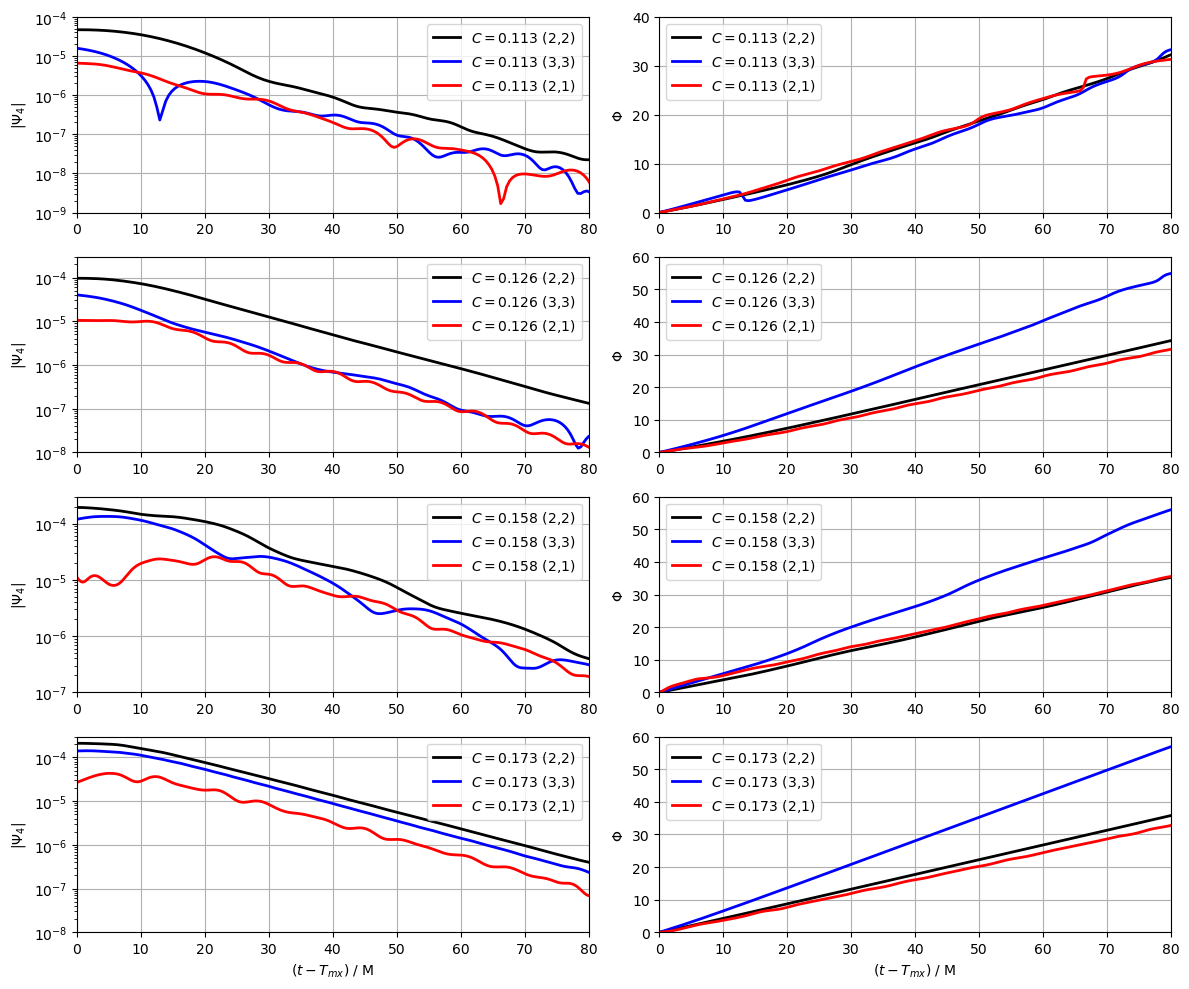

In [157]:
##quasi-normal ringing
from scipy import stats
fig, ax = plt.subplots(ncols=2,nrows=4,figsize = (12,10))
align = False
for i in [0,1,2,3]:
    BNS_coal = BNS_coal_list[i]
    time_nsbh, psi4_real_22, psi4_imag_22 = BNS_coal.psi4_real_imag_for_mode(l=2, m=2, extraction_radius=radius)
    psi4_abs_22 = np.sqrt(psi4_real_22**2 + psi4_imag_22**2)
    merger_idx = np.argmax(psi4_abs_22)
    merger_time = time_nsbh[merger_idx]
    time_21, psi4_amp_21, psi4_phase_21 = BNS_coal.psi4_amp_phase_for_mode(l=2, m=1, extraction_radius=radius)
    time_22, psi4_amp_22, psi4_phase_22 = BNS_coal.psi4_amp_phase_for_mode(l=2, m=2, extraction_radius=radius)
    time_33, psi4_amp_33, psi4_phase_33 = BNS_coal.psi4_amp_phase_for_mode(l=3, m=3, extraction_radius=radius)
    x_21, y_21, z_21 = time_21[merger_idx:]-merger_time, psi4_amp_21[merger_idx:], psi4_phase_21[merger_idx:] - psi4_phase_21[merger_idx]
    x_22, y_22, z_22 = time_22[merger_idx:]-merger_time, psi4_amp_22[merger_idx:], psi4_phase_22[merger_idx:] - psi4_phase_22[merger_idx]
    x_33, y_33, z_33 = time_33[merger_idx:]-merger_time, psi4_amp_33[merger_idx:], psi4_phase_33[merger_idx:] - psi4_phase_33[merger_idx]

    ## fit the quasinormal modes
    fit_start = np.argmax(x_21 > 20)
    fit_end   = np.argmax(x_21 > 80)
  
    y_res_22 = stats.linregress(x_22[fit_start:fit_end], np.log(y_22[fit_start:fit_end]))
    y_res_33 = stats.linregress(x_33[fit_start:fit_end], np.log(y_33[fit_start:fit_end]))
    y_res_21 = stats.linregress(x_21[fit_start:fit_end], np.log(y_21[fit_start:fit_end]))
    
    z_res_22 = stats.linregress(x_22[fit_start:fit_end], z_22[fit_start:fit_end])
    z_res_33 = stats.linregress(x_33[fit_start:fit_end], z_33[fit_start:fit_end])
    z_res_21 = stats.linregress(x_21[fit_start:fit_end], z_21[fit_start:fit_end])
    
    
    ax[i,0].plot(x_22,y_22,color="black"   , label=r"$C=$%.3f (2,2)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,0].plot(x_33,y_33,color="blue"    , label=r"$C=$%.3f (3,3)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,0].plot(x_21,y_21,color="red"     , label=r"$C=$%.3f (2,1)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,1].plot(x_22,z_22,color="black"   , label=r"$C=$%.3f (2,2)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,1].plot(x_33,z_33,color="blue"    , label=r"$C=$%.3f (3,3)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)
    ax[i,1].plot(x_21,z_21,color="red"     , label=r"$C=$%.3f (2,1)" % Compactness_list_q5_D9[i], alpha = 1.0, linewidth = 2)

#     print(r"C=%.3f tau=%f omega=%f"% (Compactness_list_q5_D9[i],-1/y_res_22.slope,z_res_22.slope))
    print("%d & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f \\\\" %
          (5, Compactness_list_q5_D9[i],\
           z_res_21.slope, -1/y_res_21.slope,\
           z_res_22.slope, -1/y_res_22.slope,\
           z_res_33.slope, -1/y_res_33.slope))
ymin_1 = [1e-9, 1e-8, 1e-7, 1e-8]
ymax_1 = [1e-4, 3e-4, 3e-4, 3e-4]
ymax_2 = [40, 60, 60, 60]
for i in range(4):
    ax[i,0].set_xlim(0,80)
    ax[i,1].set_xlim(0,80)
    ax[i,0].set_ylim(ymin_1[i], ymax_1[i])
    ax[i,1].set_ylim(0,ymax_2[i])
    ax[i,0].set_yscale("log")
    ax[i,0].grid()
    ax[i,1].grid()
#     ax[i].set_yticks(ticks=np.arange(-2,3,1)*0.0001)

    if(i==3):
        ax[i,0].set_xlabel(t_merger_label)
        ax[i,1].set_xlabel(t_merger_label)
    
    ax[i,0].set_ylabel(r"$|\Psi_4|$")
    ax[i,1].set_ylabel(r"$\Phi$")
    ax[i,0].legend(loc='upper right')
    ax[i,1].legend(loc='upper left')

# plt.suptitle(r"Post merger signals ($q=5$)",y=1.0)
plt.tight_layout()
fig.savefig(save_dir + "Ch4_q5_QNMFitting_NSBH.pdf", bbox_inches='tight')